In [1]:
from transient_solid_earth.solid_earth_full_numerical_model import SolidEarthFullNumericalModel
from transient_solid_earth.solid_earth_time_dependent_numerical_model import (
    SolidEarthTimeDependentNumericalModel,
)

In [2]:
solid_earth_full_numerical_model = SolidEarthFullNumericalModel()

In [3]:
import numpy
  
solid_earth_time_dependent_numerical_model = SolidEarthTimeDependentNumericalModel(
    solid_earth_full_numerical_model=solid_earth_full_numerical_model, period=10.0, n=20
)

In [4]:
solid_earth_time_dependent_numerical_model.model_id

'PREM_____uniform_____uniform'

In [5]:
solid_earth_time_dependent_numerical_model.integrate_y_i_systems(save=False)

array([[-2.23530921e+00+1.62778369e-01j,  2.11205477e-02+1.38640995e-03j,
        -6.18085690e-02+6.68366792e-03j],
       [-2.04208201e-02-1.46295803e-03j,  7.84651266e-03-7.15665510e-04j,
         6.99727514e-04-7.65480643e-05j],
       [ 6.46846866e-02-6.99493126e-03j,  6.99727507e-04-7.65480635e-05j,
         2.87611750e-03-3.11263342e-04j]])

17


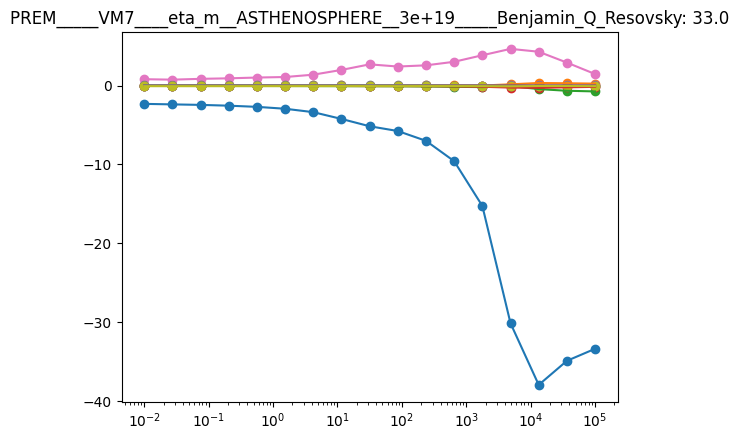

29


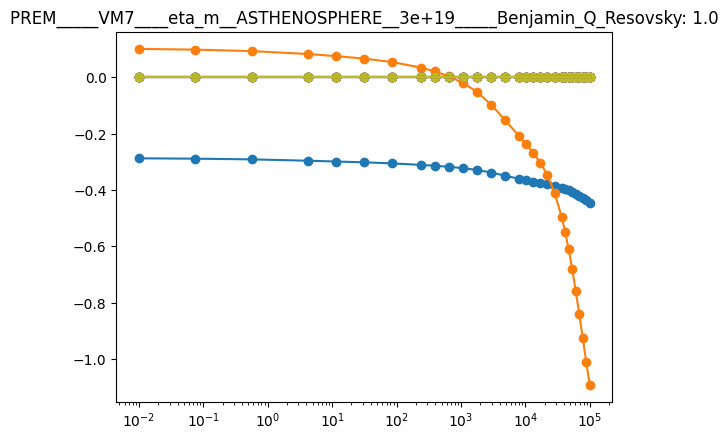

29


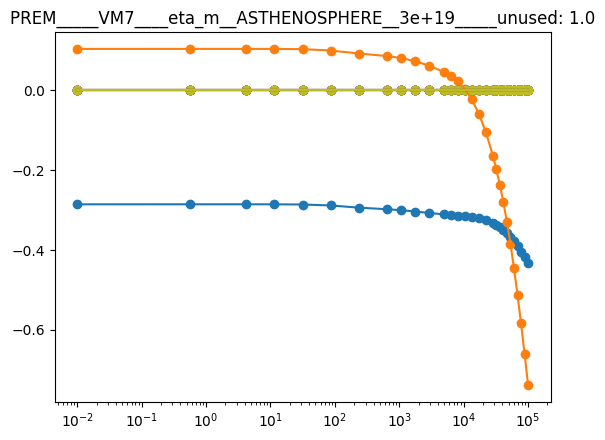

17


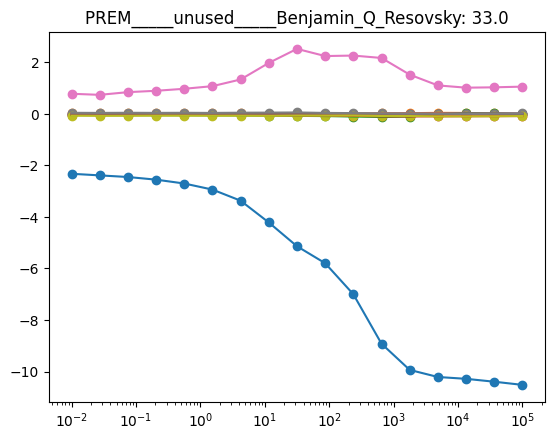

17


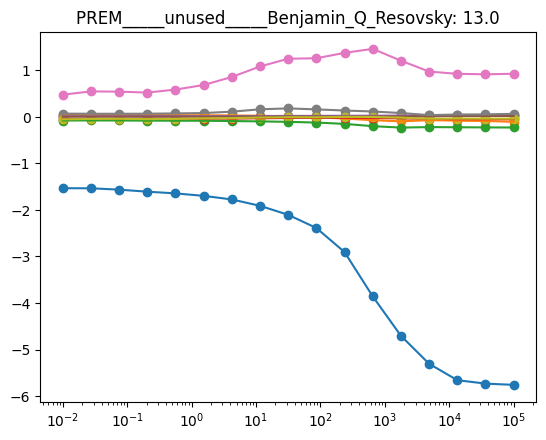

29


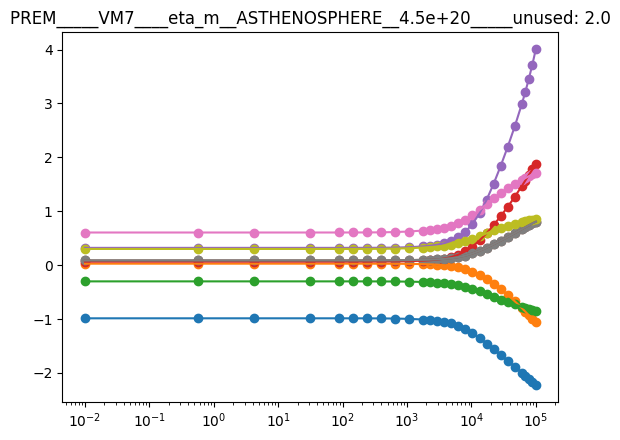

29


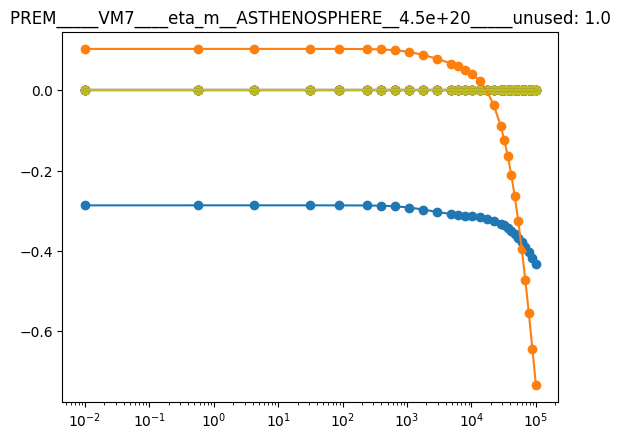

19


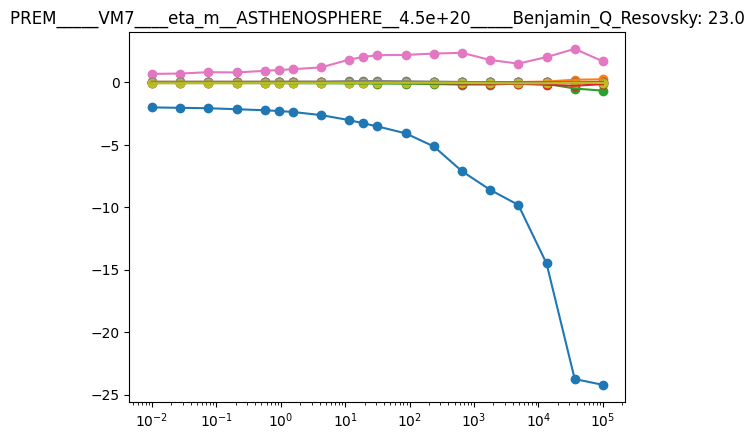

17


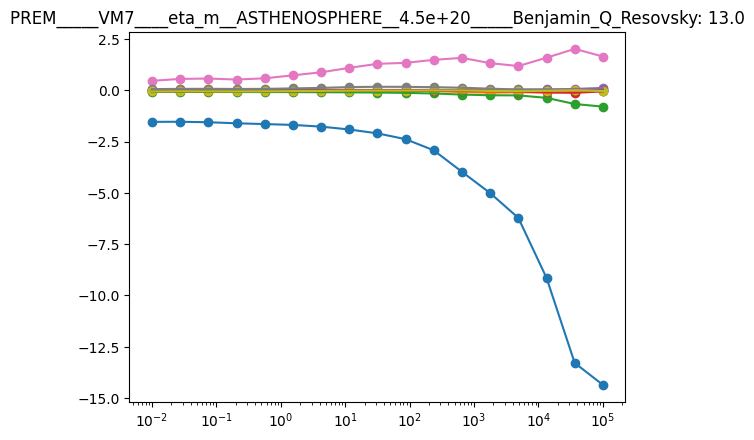

28


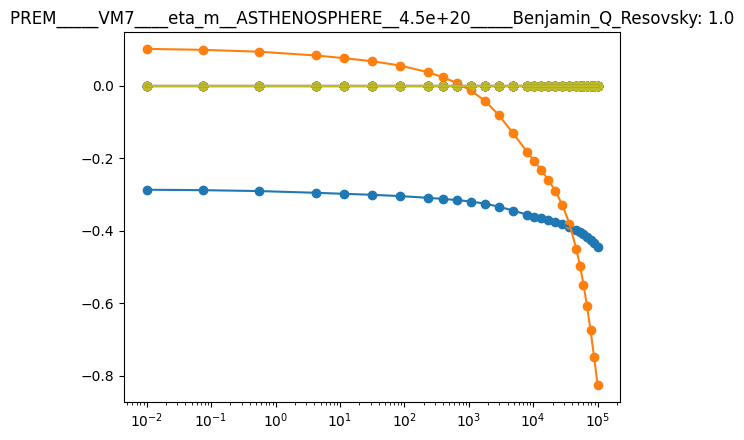

1


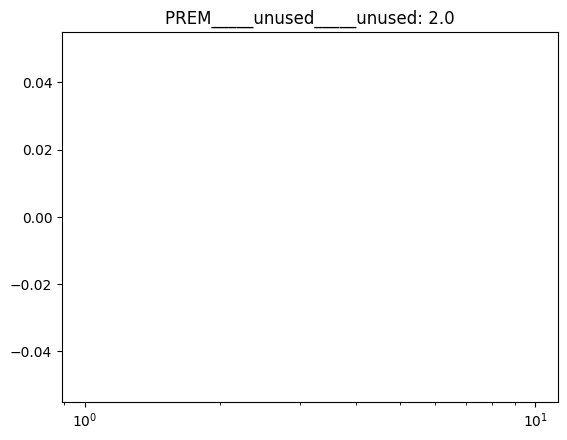

1


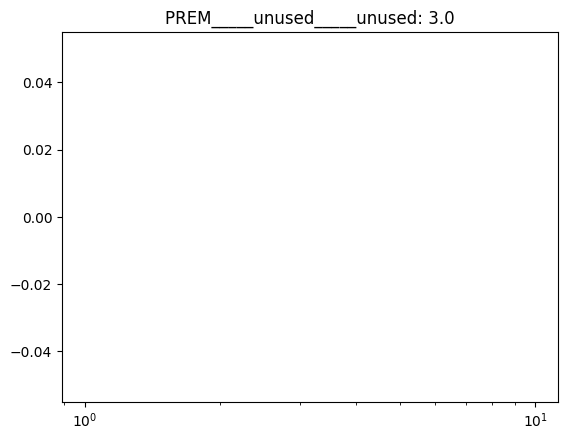

1


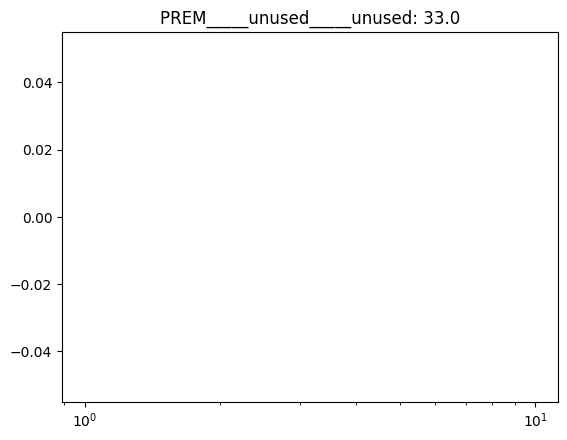

1


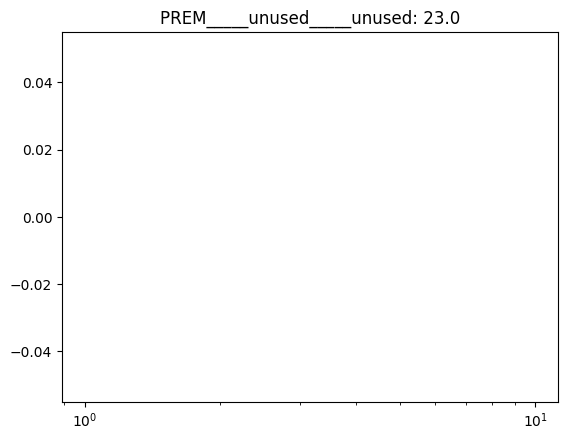

1


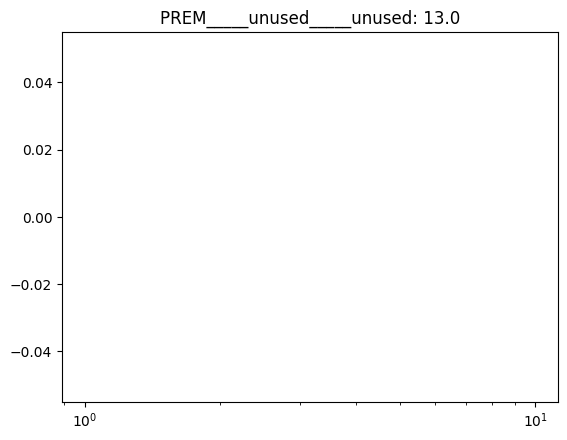

1


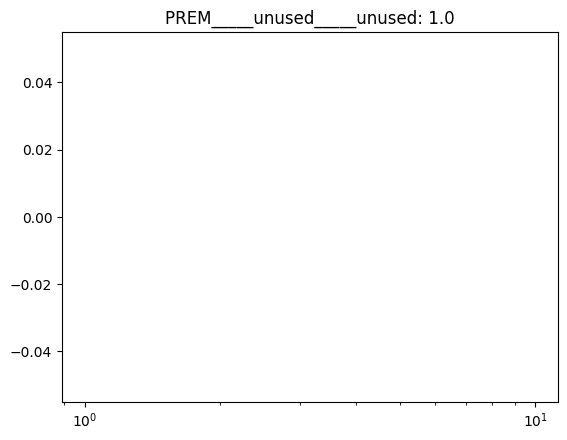

17


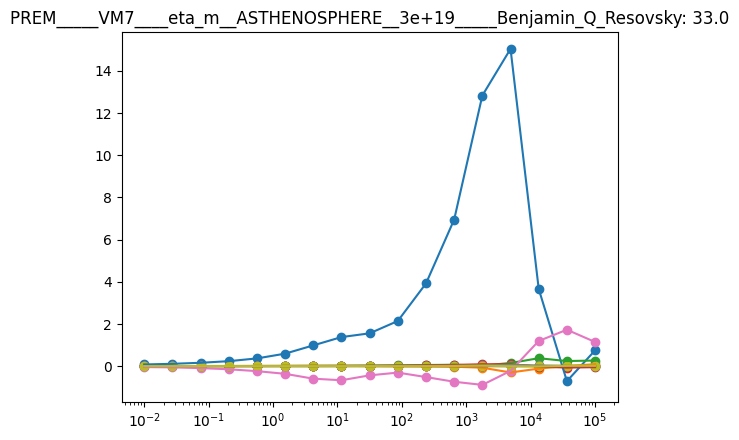

29


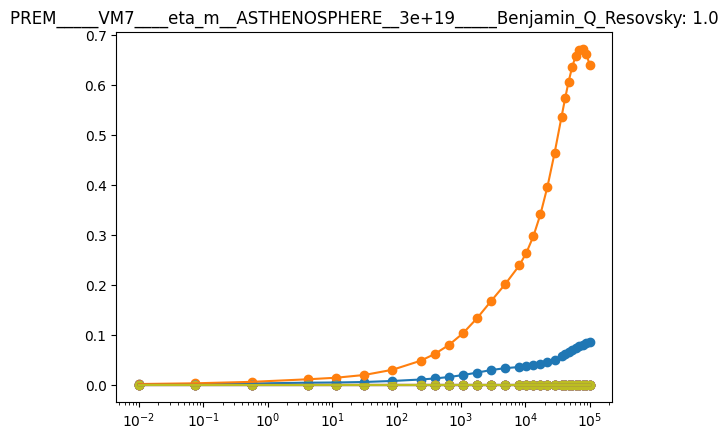

29


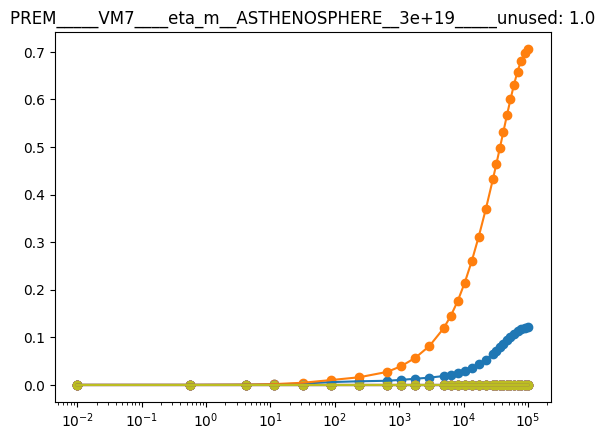

17


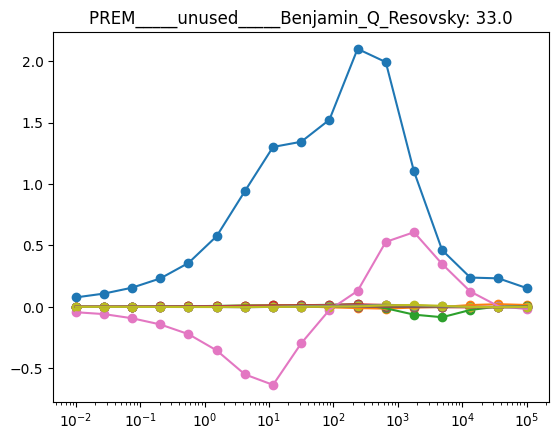

17


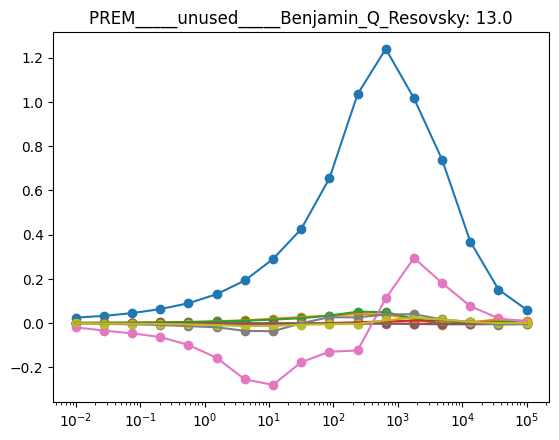

29


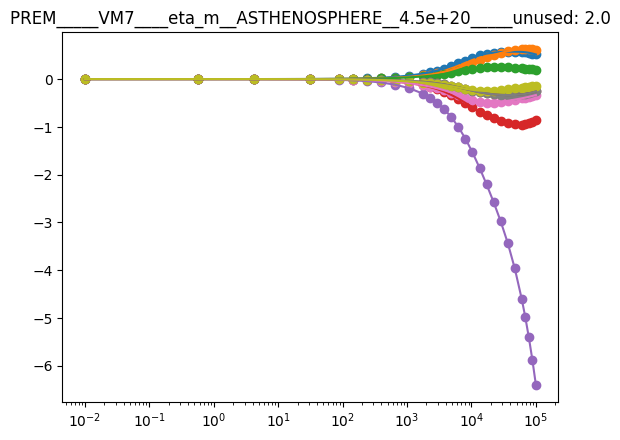

29


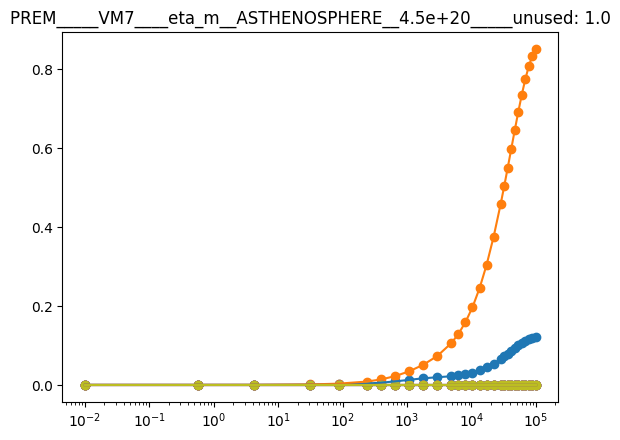

19


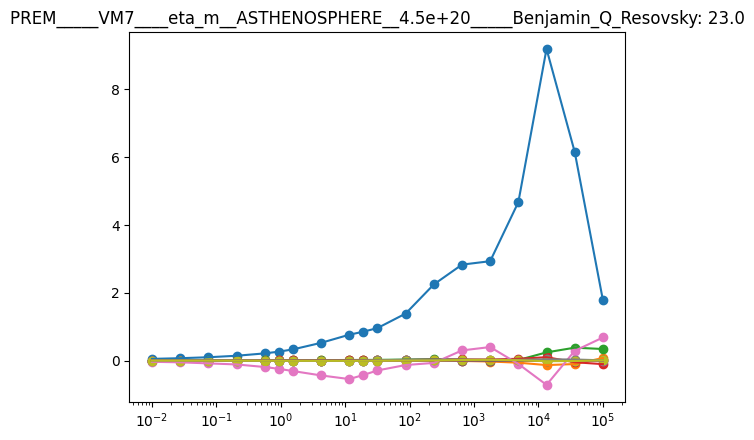

17


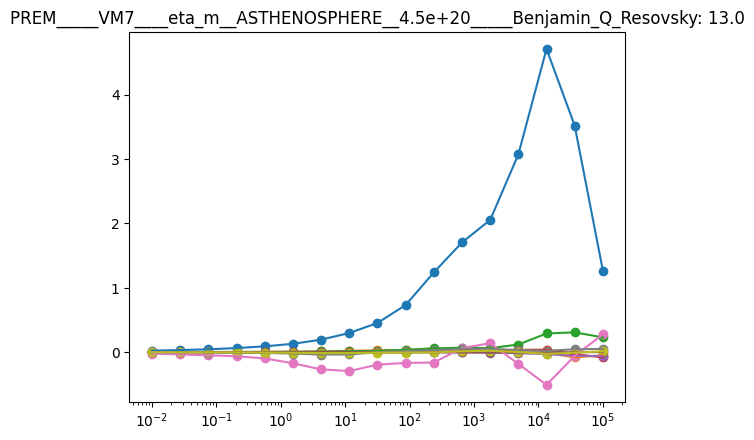

28


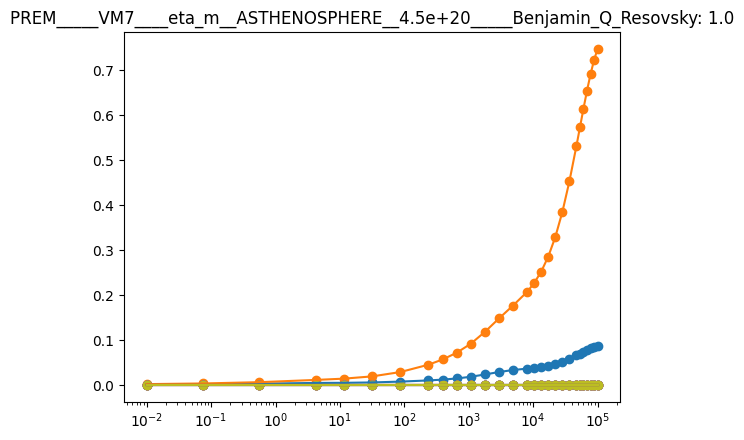

1


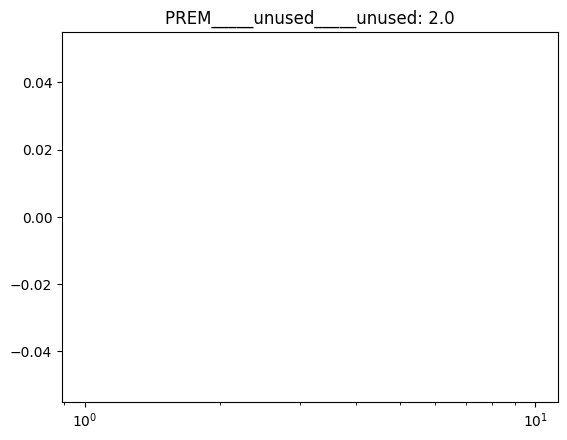

1


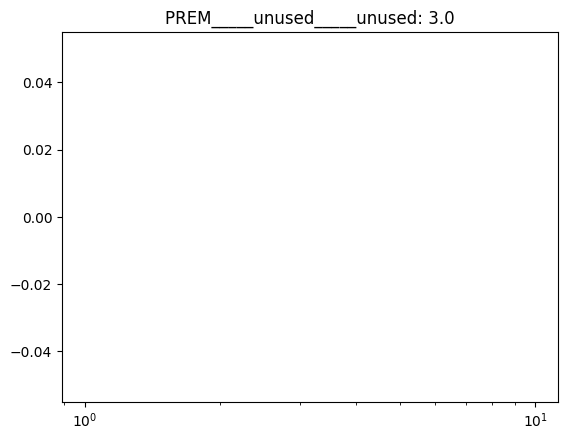

1


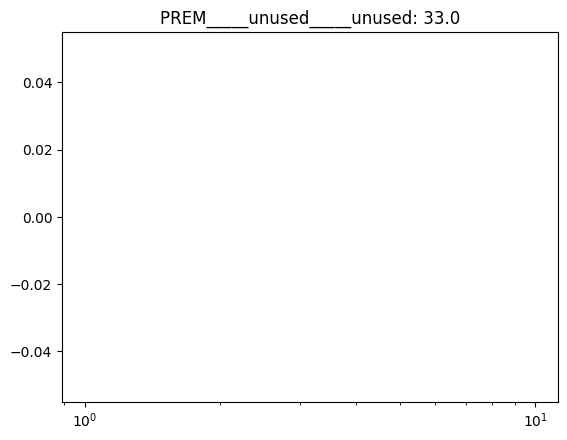

1


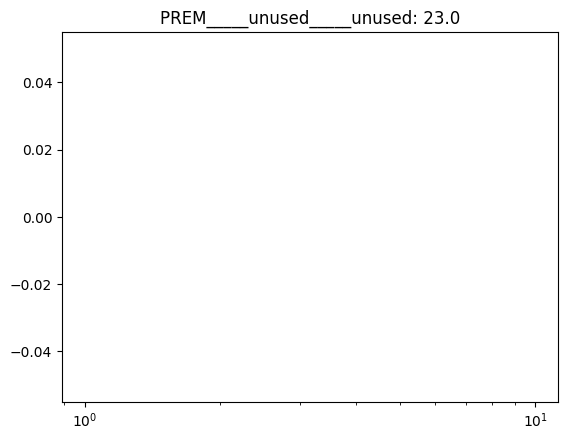

1


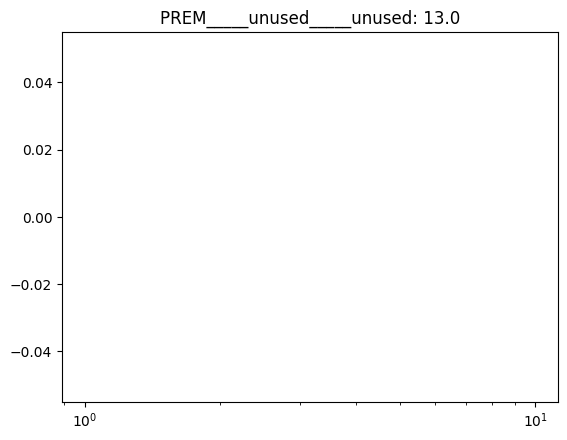

1


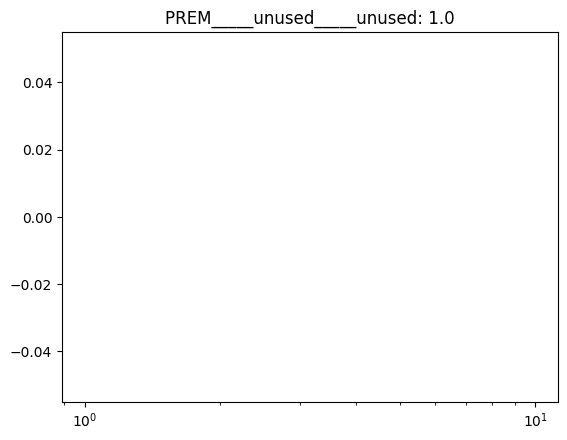

In [6]:
from pathlib import Path
from transient_solid_earth.paths import intermediate_result_subpaths
from transient_solid_earth.database import load_base_model
import numpy

path = Path(intermediate_result_subpaths["love_numbers"])
from matplotlib.pyplot import semilogx, show, title, scatter

for part in ["real", "imag"]:
    for model_path in path.iterdir():
        model_result = []
        for n_path in model_path.iterdir():
            periods = [
                float(period_path.name)
                for period_path in n_path.iterdir()
                if not period_path.is_file()
            ]
            periods.sort()
            if len(periods) > 60 or len(periods) < 30:
                degree_result = []
                for period in periods:
                    degree_result += [
                        numpy.array(
                            object=load_base_model(name=part, path=n_path.joinpath(str(period)))
                        )
                    ]
                result = numpy.array(object=degree_result)
                print(len(periods))
                for big_tab in result.transpose(1, 2, 0):
                    for tab in big_tab:
                        semilogx(
                            periods,
                            tab,
                        )
                        scatter(
                            periods,
                            tab,
                        )
                title(
                    model_path.name + ": " + n_path.name,
                )
                show()